In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

import warnings


warnings.filterwarnings('ignore')

In [2]:
X_train = pd.read_csv('agg_Xtrain.csv').set_index('Unnamed: 0')
X_test = pd.read_csv('agg_Xtest.csv').set_index('Unnamed: 0')
y_train = pd.read_csv('agg_ytrain.csv').set_index('Unnamed: 0')
y_test = pd.read_csv('agg_ytest.csv').set_index('Unnamed: 0')

In [3]:
#hyperparameter tuning
Kcv = KFold(n_splits=10)


parameters = {'weights':['uniform','distance'],
              'metric':['minkowski','euclidean','manhattan'],
              'n_neighbors':[15,20,25]
    }
knn=KNeighborsClassifier()
cv = GridSearchCV(knn, param_grid=parameters, cv=Kcv)

In [4]:
%%time
#best params found by grid search
cv.fit(X_train,y_train)
cv.best_params_

CPU times: user 14 s, sys: 3.44 s, total: 17.5 s
Wall time: 2.92 s


{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}

In [5]:
%%time
knn.set_params(**cv.best_params_)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
f1 = f1_score(y_test, pred, average='weighted')
precision = precision_score(y_test, pred, average='weighted')
recall = recall_score(y_test, pred, average='weighted')

print(f"precision: {precision}, recall: {recall}, f1score: {f1}")

precision: 0.4055957869474035, recall: 0.23809523809523808, f1score: 0.2685194458695908
CPU times: user 102 ms, sys: 16.2 ms, total: 118 ms
Wall time: 25.1 ms


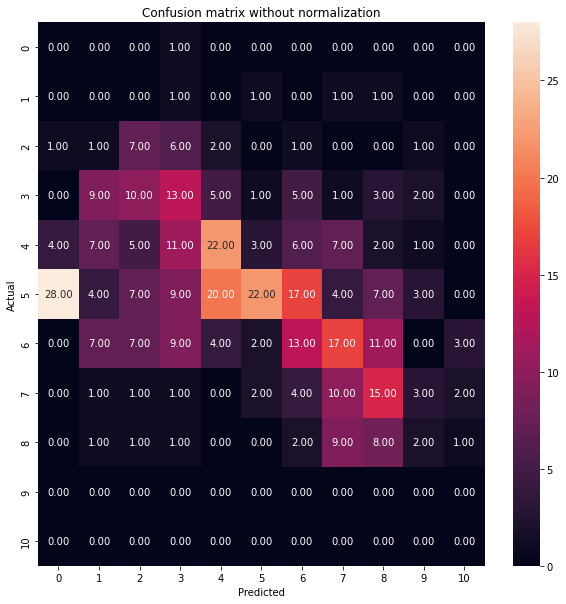

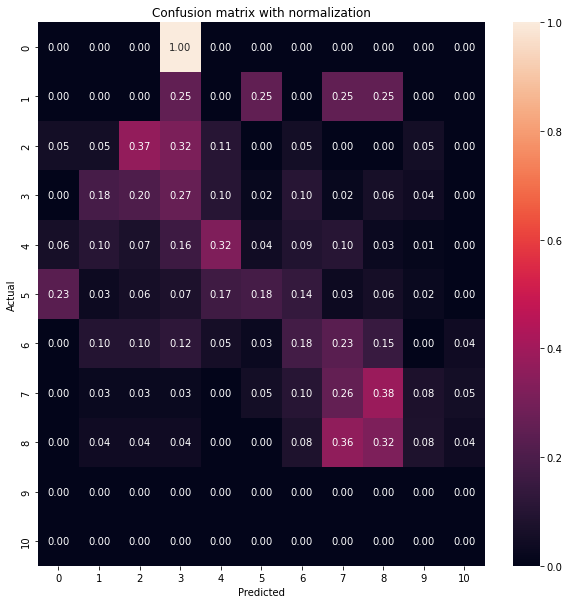

In [6]:
#plot result

matrix = confusion_matrix(y_test, pred)
matrix_normalized = confusion_matrix(y_test, pred, normalize='true')

fig1, ax = plt.subplots(figsize=(10,10))
sns.heatmap(matrix, annot=True, fmt='.2f')
plt.title('Confusion matrix without normalization')
plt.ylabel('Actual')
plt.xlabel('Predicted')

fig2, ax = plt.subplots(figsize=(10,10))
sns.heatmap(matrix_normalized, annot=True, fmt='.2f')
plt.title('Confusion matrix with normalization')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [7]:
print('training data')
print(classification_report(y_train, knn.predict(X_train)))

print('test data')
print(classification_report(y_test, knn.predict(X_test)))

training data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       337
         1.0       1.00      1.00      1.00       337
         2.0       1.00      1.00      1.00       337
         3.0       1.00      1.00      1.00       337
         4.0       1.00      1.00      1.00       337
         5.0       0.99      1.00      1.00       337
         6.0       1.00      1.00      1.00       337
         7.0       1.00      1.00      1.00       337
         8.0       1.00      1.00      1.00       337
         9.0       1.00      1.00      1.00       337
        10.0       1.00      1.00      1.00       337

    accuracy                           1.00      3707
   macro avg       1.00      1.00      1.00      3707
weighted avg       1.00      1.00      1.00      3707

test data
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.00      0.00      0.00         4
